In [23]:
# Задача обратного интерполирования

In [24]:
f(x) = exp(x) - x

f (generic function with 1 method)

In [25]:
(a, b, mp1, n, eps) = (5, 6, 10, 7, 1e-8)

(5, 6, 10, 7, 1.0e-8)

In [26]:
# x = parse(Float64, readline())
#arg = 0.43243242
arg = 5.2342432
x = exp(arg) - arg

182.35284350352808

In [27]:
r = LinRange(a, b, mp1)
x_table = collect(r)
y_table = f.(x_table)

10-element Vector{Float64}:
 143.4131591025766
 160.74342423823842
 180.1233836679973
 201.79391555650136
 226.02420584598772
 253.11507495994425
 283.4026954578855
 317.26274658545645
 355.1150570633958
 397.4287934927351

In [28]:
full_table = [el for el in zip(y_table, x_table)] # x_table and y_table changed
pred = elem -> abs(elem[1] - x) # sort by closest element
sort!(full_table, by=pred)
chopped_table = collect(Iterators.take(full_table, n + 1))
chopped_x_table = collect(map(el -> el[1], chopped_table))
println(chopped_x_table)
chopped_y_table = collect(map(el -> el[2], chopped_table))

#sort back?
#chopped_table = collect(zip(chopped_x_table, chopped_y_table))
#sort!(chopped_table)
#chopped_x_table = collect(map(el -> el[1], chopped_table))
#chopped_y_table = collect(map(el -> el[2], chopped_table))

[180.1233836679973, 201.79391555650136, 160.74342423823842, 143.4131591025766, 226.02420584598772, 253.11507495994425, 283.4026954578855, 317.26274658545645]


8-element Vector{Float64}:
 5.222222222222222
 5.333333333333334
 5.111111111111112
 5.0
 5.444444444444445
 5.555555555555555
 5.666666666666667
 5.777777777777779

In [29]:
using Polynomials, SpecialPolynomials
lagrange = fit(Lagrange, chopped_x_table, chopped_y_table)
display("text/latex", lagrange)
err_lagrange = abs(lagrange(x) - arg) / arg
println("$(err_lagrange*100) %")
println(lagrange(x))

8.621127142162682e-7 %
5.234243154874924


In [30]:
using Polynomials, SpecialPolynomials
newton = fit(Newton, chopped_x_table, chopped_y_table)
np = convert(Polynomial, newton)
display("text/latex", newton)
err_newton = abs(newton(x) - arg) / arg
println("$(err_newton*100) %")
println(newton(x))

8.621126972476562e-7 %
5.234243154874925


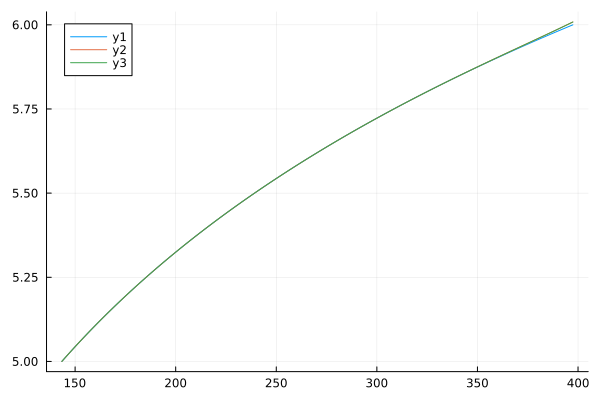

In [32]:
using Plots
r = LinRange(a, b, 1000)
x_table = collect(r)
true_table = f.(x_table)
ltable = lagrange.(true_table)
ntable = newton.(true_table)
plot(true_table, [x_table, ltable,  ntable])